<a href="https://colab.research.google.com/github/Dharuf/Phyton/blob/main/Metrica_de_avalia%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorboard

In [3]:
from tensorflow.keras import datasets, layers,models
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.callbacks import TensorBoard

import numpy as np

import seaborn as sns

import pandas as pd


In [4]:
tf.__version__

'2.14.0'

In [5]:
%load_ext tensorboard

In [6]:
logdir='log'

In [7]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes =[0,1,2,3,4,5,6,7,8,9]

11490434/11490434 [==============================] - 0s 0us/step


In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))


model.add(layers.Conv2D(64,(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))


model.add(layers.Conv2D(128,(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation ='relu'))
model.add(Dropout(0.1))

model.add(layers.Dense(64, activation ='relu'))
model.add(Dropout(0.1))

model.add(layers.Dense(10, activation ='softmax'))


In [21]:
tensorboard_callback = TensorBoard(log_dir='./logs')

In [22]:
#tensorboard_callback = tf.keras.callbacks.tensorboard(logdir, histogram_freq=1)


In [23]:
model.compile(optimizer ='adam',
              loss='sparse_categorical_crossentropy',
              metrics =['accuracy'])

history = model.fit(x=train_images,
          y=train_labels,
          epochs=5,
          validation_data=(test_images,test_labels))

Epoch 1/5
1875/1875 [==============================] - 15s 5ms/step - loss: 0.1542 - accuracy: 0.9535 - val_loss: 0.0745 - val_accuracy: 0.9786
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0676 - accuracy: 0.9800 - val_loss: 0.0583 - val_accuracy: 0.9837
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0521 - accuracy: 0.9849 - val_loss: 0.0495 - val_accuracy: 0.9866
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0415 - accuracy: 0.9877 - val_loss: 0.0564 - val_accuracy: 0.9856
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0360 - accuracy: 0.9891 - val_loss: 0.0540 - val_accuracy: 0.9860


In [24]:
y_true=test_labels
#y_pred=model.predict_classes(test_images)
y_pred=np.argmax(model.predict(test_images), axis=1)

313/313 [==============================] - 1s 2ms/step


In [25]:
classes=[0,1,2,3,4,5,6,7,8,9]

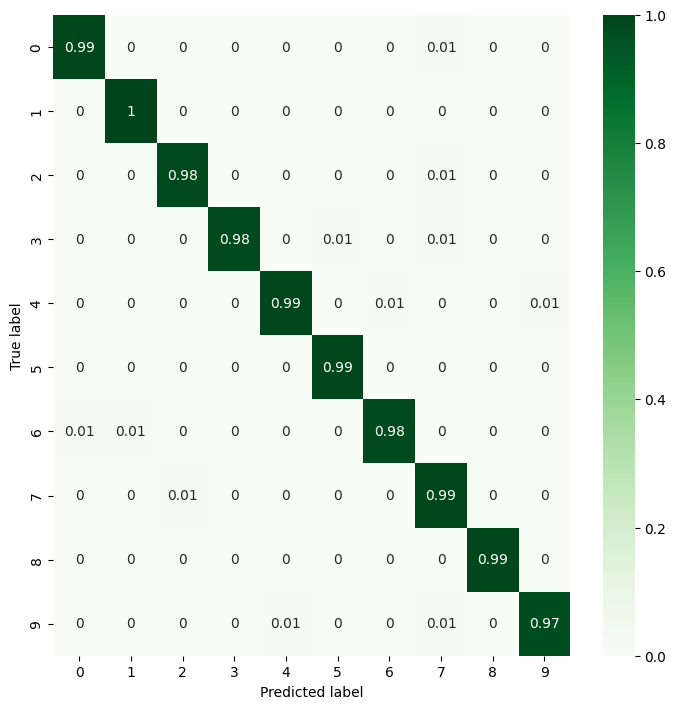

In [26]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                          index = classes,
                          columns = classes)

figure = plt.figure(figsize=(7,7))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Greens)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

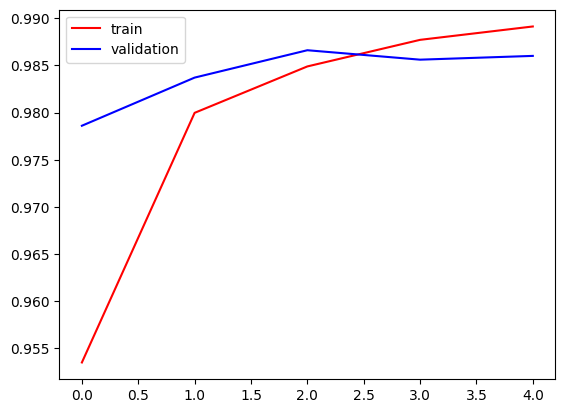

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color ='red',label ='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

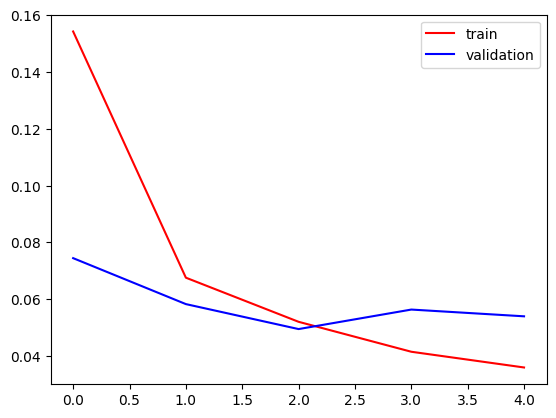

In [28]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()